# Anomaly Detection

1. [Supervised Learning](#Supervised-Learning)  
    - Dataset 1 - Credit Card Fraud Detection (source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)  
    - EDA (confusion matrix, heatmap, feature and class distribution, correlation; matplotlib, seaborn)
    - Model evaluation (imbalanced class, precision-recall, AUC ROC, AUPRC, SMOTE/Class Weights/undersampling, threshold analysis)

2. [TODO - Unsupervised Learning](#Unsupervised-Learning)  
    - Dataset 2 -   
    - Techniques used and results

### Summary




<a name='Supervised-Learning'></a>
## Supervised Learning

1. [Data preparation and visualization](#data-preparation-and-visualization)
2. [Model development](#model-development)
3. [Model evaluation](#model-evaluation)

In [1]:
# Unzip the credit card file, load data to dataframe, then delete the large unzipped csv file

# ==========================
# print all files in the current directory
# import os
# for dirname, _, filenames in os.walk('./'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
# ==========================

# Step 1: unzip file
from zipfile import ZipFile
with ZipFile('./data/credit-card-fraud/creditcard.csv.zip', 'r') as zip_object:
    zip_object.extractall('./data/credit-card-fraud/')

# ==========================
# (Optional) If file is too large, we can divide it and load them to datafram.
# Step 2.1: Divide the original credit card fraud file (150.8MB, too large to upload to Github) into smaller size 
# import pandas as pd

# input_csv_file_path = './data/credit-card-fraud/creditcard.csv'
# rows_per_file = 50_000
# output_prefix = 'data/credit-card-fraud/creditcard_part_'

# csv_reader = pd.read_csv(input_csv_file_path, chunksize=rows_per_file)
# for i, chunk in enumerate(csv_reader):
#     output_file = f'{output_prefix}{i}.csv'
#     chunk.to_csv(output_file, index=False)
#     print(f'Created {output_file}')

# Step 2.2: Load files into a data frame
# import pandas as pd
# import glob

# path = './data/credit-card-fraud/'
# all_files = glob.glob(path + "creditcard_part_*.csv")

# df_list = []
# for filename in all_files:
#     df = pd.read_csv(filename)
#     df_list.append(df)
# df = pd.concat(df_list, ignore_index=True)
# ==========================

# Step 2: load data to dataframe
import pandas as pd
df = pd.read_csv('./data/credit-card-fraud/creditcard.csv')

# Step 3: delete the original large csv file
import os
input_csv_file_path = './data/credit-card-fraud/creditcard.csv'
os.remove(input_csv_file_path)

<a name='data-preparation-and-visualization'></a>
## Data Preparation and Visualization

In [2]:
df.shape
print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns")

Dataset loaded with 284807 rows and 31 columns


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,94813.860,47488.146,0.000,54201.500,84692.000,139320.500,172792.000
V1,284807.0,0.000,1.959,-56.408,-0.920,0.018,1.316,2.455
V2,284807.0,0.000,1.651,-72.716,-0.599,0.065,0.804,22.058
V3,284807.0,-0.000,1.516,-48.326,-0.890,0.180,1.027,9.383
V4,284807.0,0.000,1.416,-5.683,-0.849,-0.020,0.743,16.875
V5,284807.0,0.000,1.380,-113.743,-0.692,-0.054,0.612,34.802
V6,284807.0,0.000,1.332,-26.161,-0.768,-0.274,0.399,73.302
V7,284807.0,-0.000,1.237,-43.557,-0.554,0.040,0.570,120.589
V8,284807.0,0.000,1.194,-73.217,-0.209,0.022,0.327,20.007
V9,284807.0,-0.000,1.099,-13.434,-0.643,-0.051,0.597,15.595


In [6]:
# Checking missing data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. count null values in each column
null_counts_per_column = df.isna().sum()
print(f'Columns with null values:\n{null_counts_per_column[null_counts_per_column > 0]}\n')

# 2. get percentage of null values per column
percentage_nulls = (df.isna().sum() / len(df)) * 100
print(f'Percentage of null values per column:\n{percentage_nulls[percentage_nulls > 0]}\n')

# Visualize missing values if any
if null_counts_per_column.sum() > 0:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isna(), cbar=False, yticklabels=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.tight_layout()
    plt.show()

Columns with null values:
Series([], dtype: int64)

Percentage of null values per column:
Series([], dtype: float64)



In [7]:
# Check and drop duplicated rows
print(df.duplicated().sum())
df.drop_duplicates(inplace=True, ignore_index=True)
df.shape

1081


(283726, 31)

In [8]:
# Class distribution
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

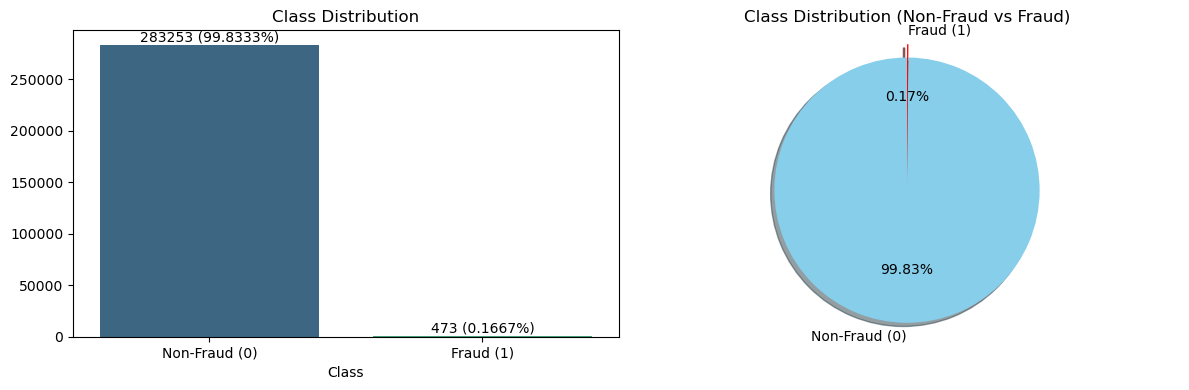

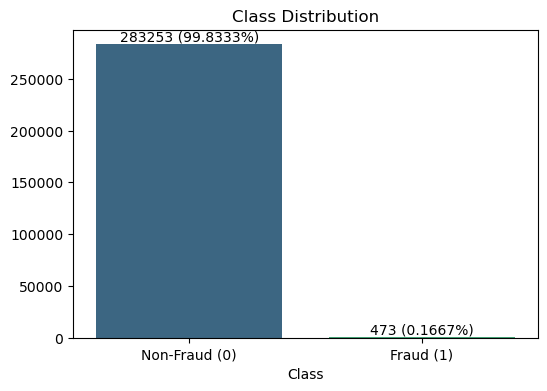

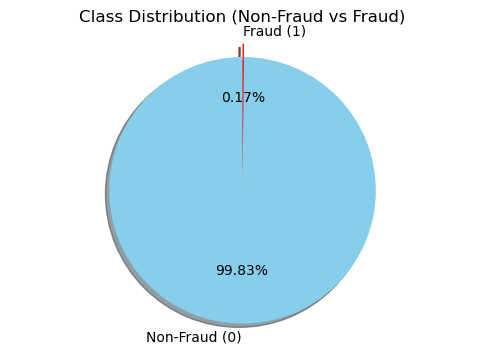

In [9]:
# Visualize class distribution
# Draw all plots in one canvas
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

class_counts = df['Class'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis', hue=class_counts.index, legend=False, ax=ax1)
ax1.set_title('Class Distribution')
ax1.set_xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
for i, v in enumerate(class_counts.values):
    ax1.text(i, v + 500, f'{v} ({v/df.shape[0]*100:.4f}%)', ha='center', va='bottom', fontsize=10)

ax2.pie(class_counts, labels=['Non-Fraud (0)', 'Fraud (1)'], autopct='%1.2f%%', colors=['skyblue', 'red'], explode=[0, 0.1], shadow=True, startangle=90)
ax2.set_title('Class Distribution (Non-Fraud vs Fraud)')
ax2.axis('equal')

plt.tight_layout() # Adjust layout to prevent titles/labels from overlapping
plt.show()


# ==========================
# Alternative way of ploting. Draw each plot seperately
# bar plot
plt.figure(figsize=(6, 4))
class_counts = df['Class'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis', hue=class_counts.index, legend=False)
plt.title('Class Distribution')
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 500, f'{v} ({v/df.shape[0]*100:.4f}%)', ha='center', va='bottom', fontsize=10)
plt.show()

# pie chart
plt.figure(figsize=(6, 4))
plt.pie(class_counts, labels=['Non-Fraud (0)', 'Fraud (1)'], autopct='%1.2f%%', colors=['skyblue', 'red'], explode=[0, 0.1], shadow=True, startangle=90)
plt.title('Class Distribution (Non-Fraud vs Fraud)')
plt.axis('equal')
plt.show()
# ==========================


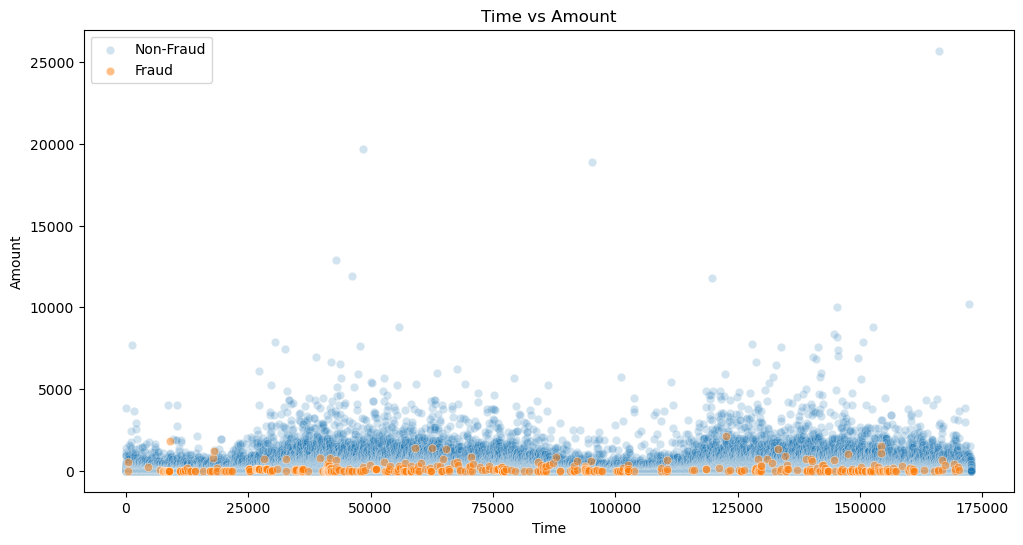

In [10]:
# Time vs Amount plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(data=df[df['Class']==0], x='Time', y='Amount', label='Non-Fraud', alpha=0.2)
sns.scatterplot(data=df[df['Class']==1], x='Time', y='Amount', label='Fraud', alpha=0.5)
plt.title('Time vs Amount')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

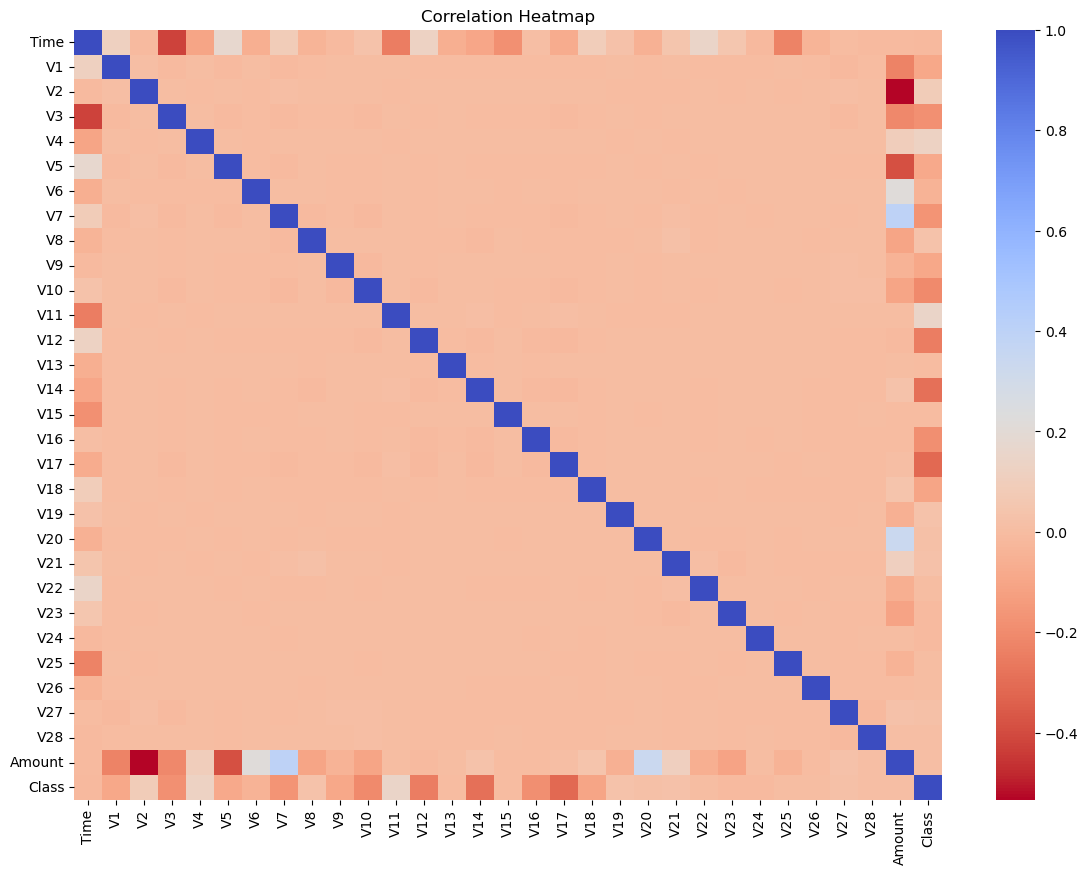

In [11]:
# Correlation matrix with heatmap
plt.figure(figsize=(14,10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot=False)
plt.title('Correlation Heatmap')
plt.show()


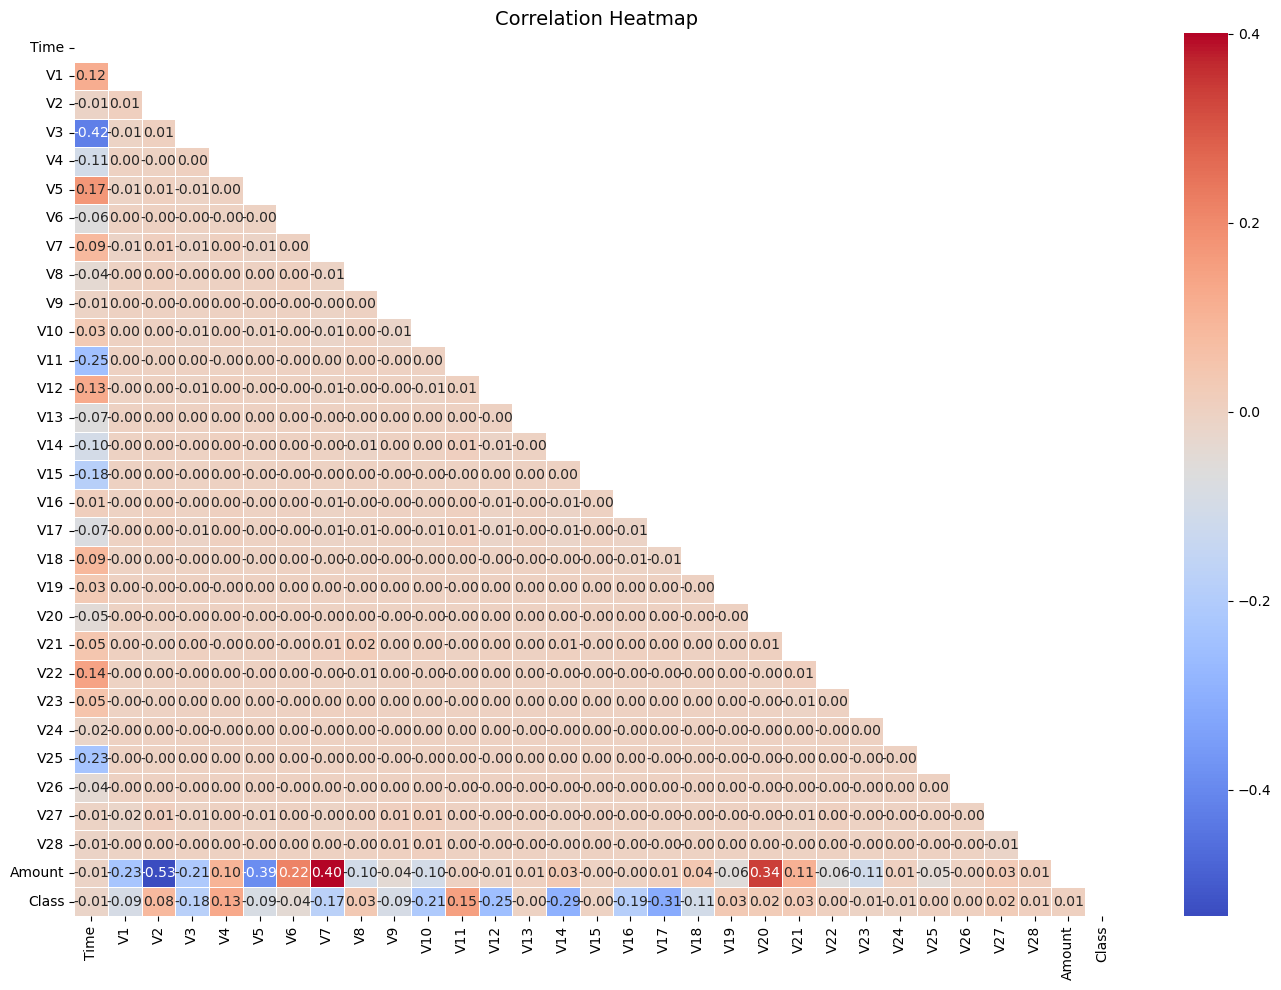

In [12]:
import numpy as np

# Correlation heatmap variant
plt.figure(figsize=(14,10))
corr = df.corr()
mask = np.triu(corr)
sns.heatmap(corr, annot=True, fmt='.2f', mask=mask, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.show()

Top 10 features most correlated with Class (both neg and pos correlated):
V17    0.313498
V14    0.293375
V12    0.250711
V10    0.206971
V16    0.187186
V3     0.182322
V7     0.172347
V11    0.149067
V4     0.129326
V18    0.105340
Name: Class, dtype: float64


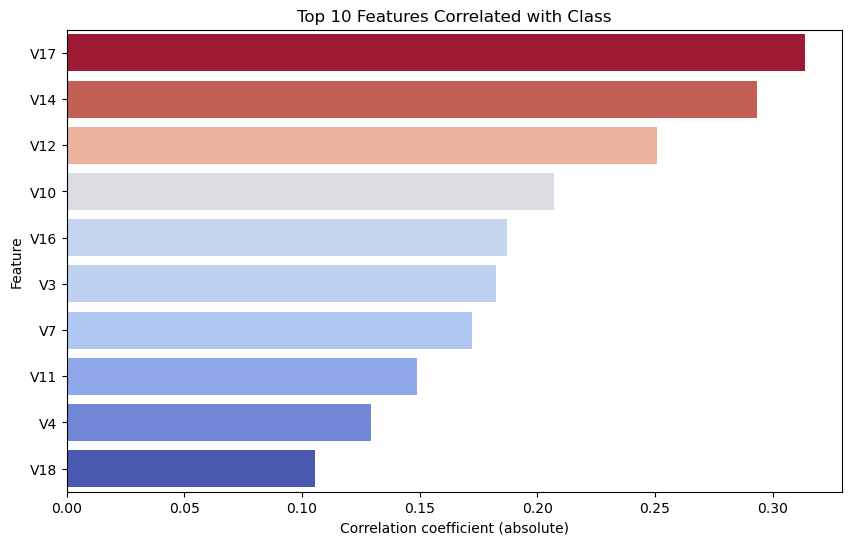

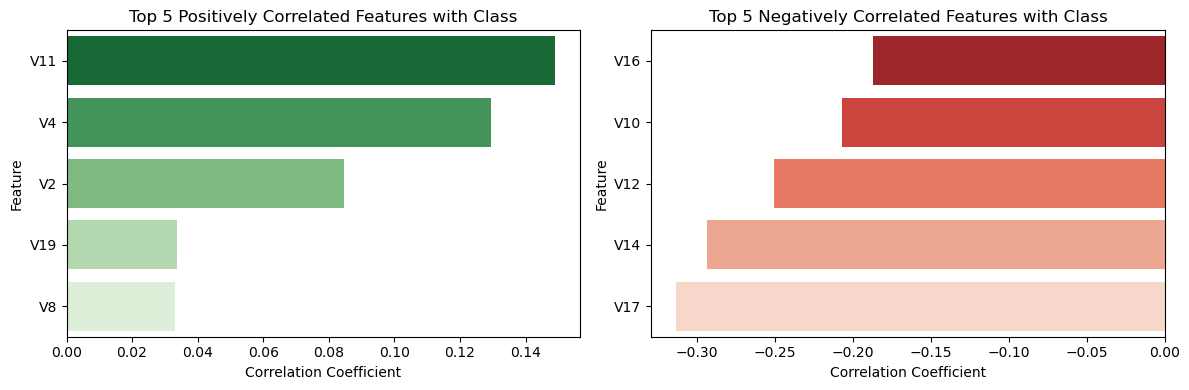

In [13]:
# Top 10 features most correlated with fraud
corr = df.corr()
corr_target = corr['Class'].drop('Class')
top_features = corr_target.abs().sort_values(ascending=False).head(10)

print("Top 10 features most correlated with Class (both neg and pos correlated):")
print(top_features)

# Plot top 10 most correlated features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='coolwarm', hue=top_features.values, legend=False)
plt.title('Top 10 Features Correlated with Class')
plt.xlabel("Correlation coefficient (absolute)")
plt.ylabel('Feature')
plt.show()

# Plot top 5 most positive and negative correlated features
top_pos_features = corr_target.sort_values(ascending=False)[:5]
top_neg_features = corr_target.sort_values(ascending=False)[-5:]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.barplot(x=top_pos_features.values, y=top_pos_features.index, palette='Greens_r', hue=top_pos_features.index, ax=ax1)
ax1.set_title('Top 5 Positively Correlated Features with Class')
ax1.set_xlabel('Correlation Coefficient')
ax1.set_ylabel('Feature')
sns.barplot(x=top_neg_features.values, y=top_neg_features.index, palette='Reds_r', hue=top_neg_features.index, ax=ax2)
ax2.set_title('Top 5 Negatively Correlated Features with Class')
ax2.set_xlabel('Correlation Coefficient')
ax2.set_ylabel('Feature')
plt.tight_layout()
plt.show()

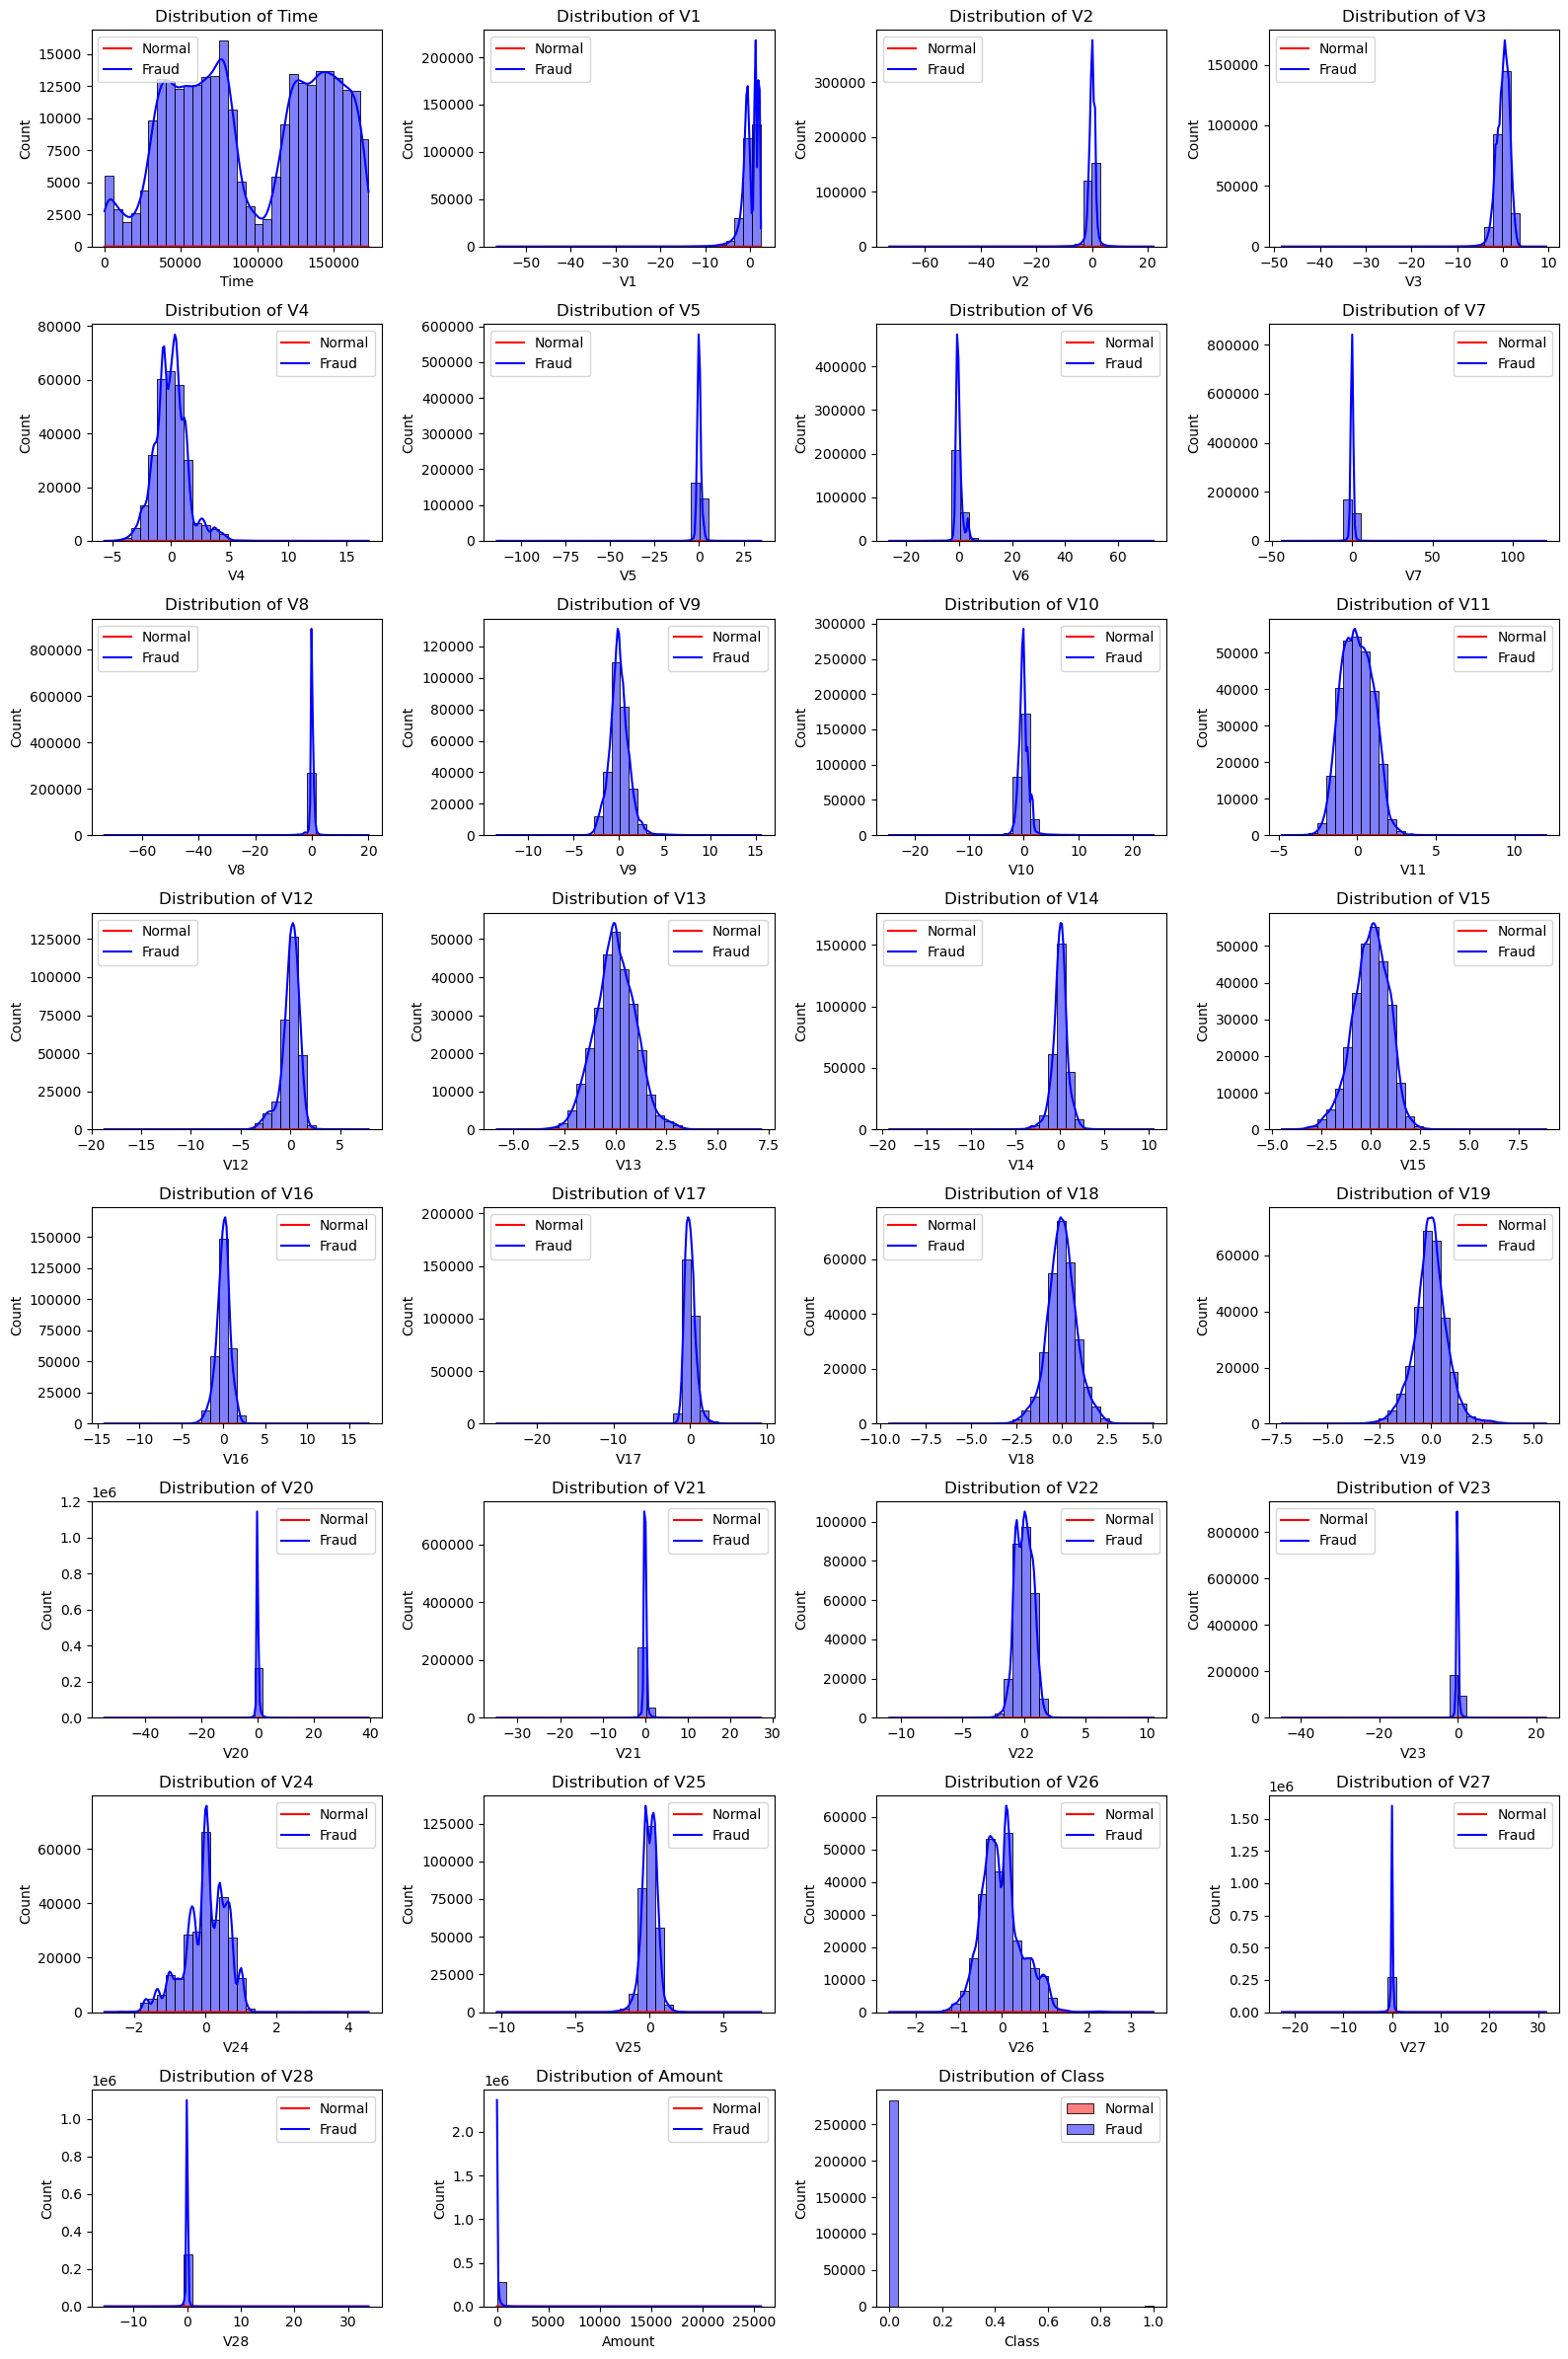

In [14]:
# Plot feature distribution
corr = df.corr()
fig = plt.figure(figsize=(16, 24))
for i, feature in enumerate(corr):
    plt.subplot(8, 4, i+1)
    sns.histplot(data=df, x=feature, hue='Class', bins=30, kde=True, palette=['blue', 'red'])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(['Normal', 'Fraud'])
plt.tight_layout()
plt.show()

<a name='model-development'></a>
## Model development

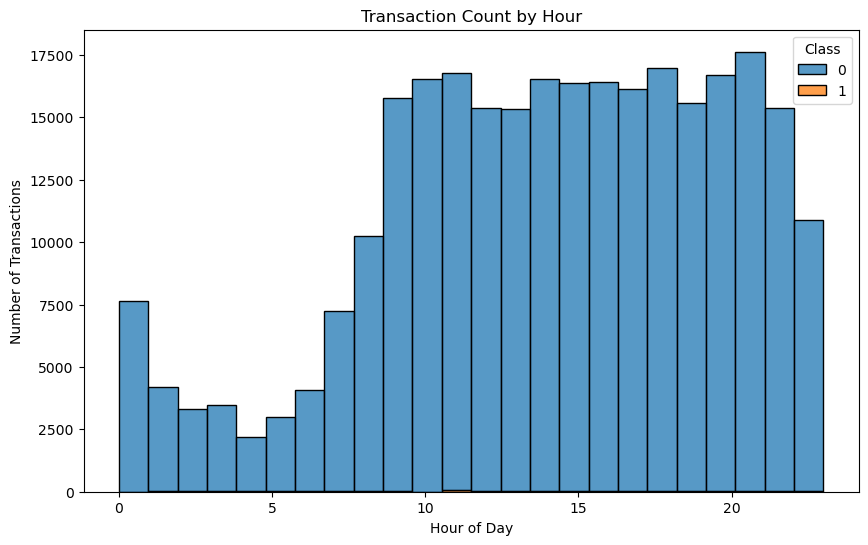

In [15]:
# Feature engineering
# Add new feature: Hour of the transaction
df['Hour'] = (df['Time'] // 3600) % 24

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Hour', hue='Class', bins=24, multiple='stack')
plt.title('Transaction Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.show()

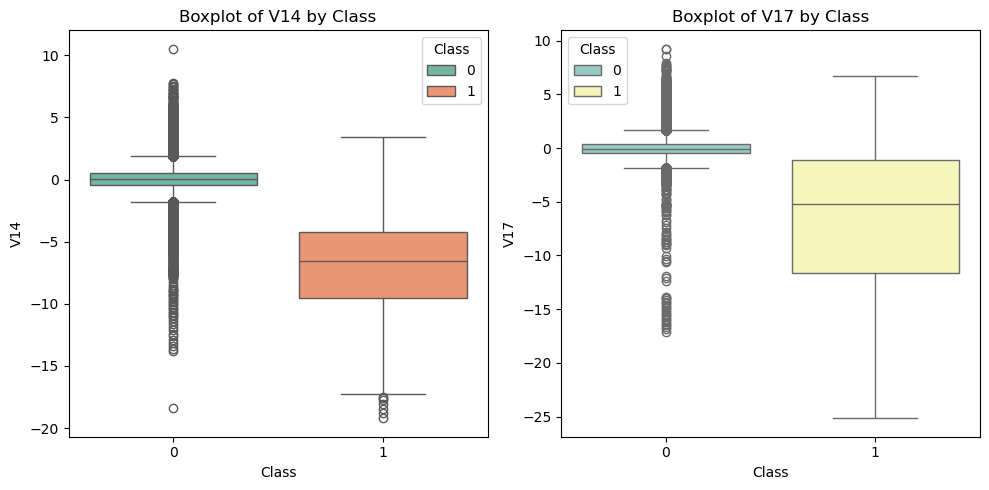

In [16]:
# Plot key features V14 and V17
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.boxplot(data=df, x='Class', y='V14', palette='Set2', hue='Class', ax=ax1)
ax1.set_title('Boxplot of V14 by Class')
ax1.set_xlabel('Class')
ax1.set_ylabel('V14')
sns.boxplot(data=df, x='Class', y='V17', palette='Set3', hue='Class', ax=ax2)
ax2.set_title('Boxplot of V17 by Class')
ax2.set_xlabel('Class')
ax2.set_ylabel('V17')
plt.tight_layout()
plt.show()

In [17]:
# Data preprocessing
X = df.drop(['Class'], axis=1)
y = df['Class']

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Class distribution in training set: {np.bincount(y_train)}")
print(f"Class distribution in testing set: {np.bincount(y_test)}")

Training set shape: (226980, 31)
Testing set shape: (56746, 31)
Class distribution in training set: [226602    378]
Class distribution in testing set: [56651    95]


In [18]:
# Feature scaling
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train[['Amount', 'Time']] = scaler.fit_transform(X_train[['Amount', 'Time']])
X_test[['Amount', 'Time']] = scaler.transform(X_test[['Amount', 'Time']])

In [19]:
# stats of training data after scaling
X_train.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Time,226980.0,0.118,0.558,-0.996,-0.359,0.000,0.641,1.034
V1,226980.0,0.005,1.947,-56.408,-0.916,0.018,1.315,2.455
V2,226980.0,-0.006,1.650,-72.716,-0.601,0.064,0.801,22.058
V3,226980.0,0.002,1.507,-33.681,-0.887,0.178,1.027,9.383
V4,226980.0,-0.002,1.417,-5.683,-0.849,-0.022,0.741,16.875
V5,226980.0,0.005,1.360,-32.092,-0.689,-0.052,0.615,34.802
V6,226980.0,-0.002,1.323,-26.161,-0.769,-0.276,0.397,21.393
V7,226980.0,0.001,1.200,-43.557,-0.552,0.041,0.572,34.303
V8,226980.0,-0.000,1.169,-73.217,-0.209,0.022,0.325,20.007
V9,226980.0,-0.003,1.094,-13.434,-0.644,-0.053,0.594,15.595


#### Random Forest Classifier


In [20]:
# Train Random Forest Classifier models
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, average_precision_score, roc_auc_score

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)

# Train the model
print("Training Random Forest model...")
start_time = time.time()
rf_model.fit(X_train, y_train)
end_time = time.time()
print(f"Random Forest model trained in {end_time - start_time:.2f} seconds.")

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

Training Random Forest model...
Random Forest model trained in 10.62 seconds.



Random Forest Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.69      0.81        95

    accuracy                           1.00     56746
   macro avg       0.99      0.85      0.90     56746
weighted avg       1.00      1.00      1.00     56746

AUPRC: 0.8231
AUPRC2: 0.8140
ROC AUC: 0.9299


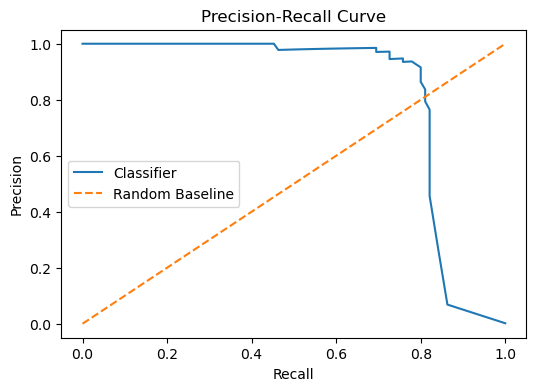

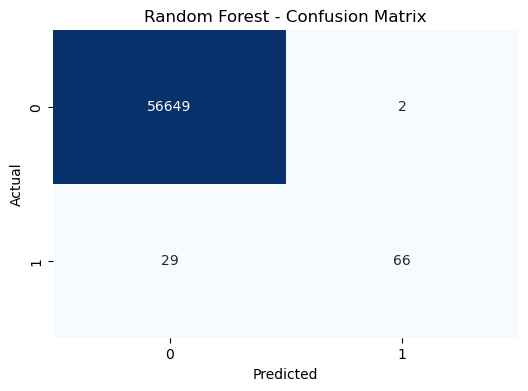

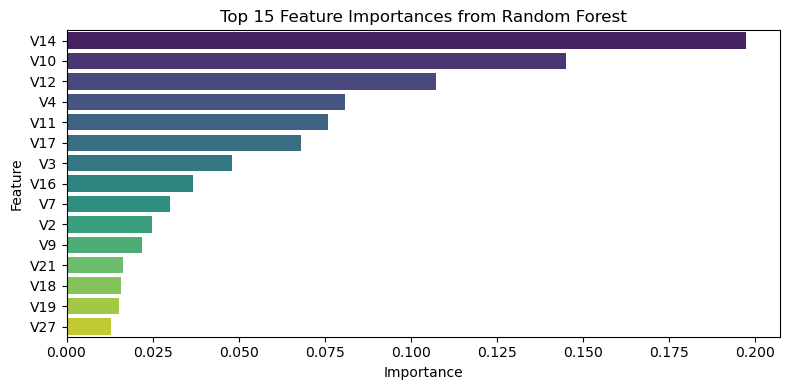

In [21]:
# Evaluate the model
print("\nRandom Forest Model Evaluation:")
print(classification_report(y_test, y_pred_rf))

# Calculate AUPRC (Area Under Precision-Recall Curve)
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_pred_proba_rf)
auprc_rf = auc(recall_rf, precision_rf)
auprc2_rf = average_precision_score(y_test, y_pred_proba_rf) # alternative AUPRC calculation

print(f"AUPRC: {auprc_rf:.4f}")
print(f"AUPRC2: {auprc2_rf:.4f}")
# Calculate ROC AUC
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"ROC AUC: {roc_auc_rf:.4f}")

plt.figure(figsize=(6, 4))
plt.plot(recall_rf, precision_rf, label='Classifier')
random_baseline = np.linspace(0, 1, len(precision_rf))
plt.plot(random_baseline, random_baseline, linestyle='--', label='Random Baseline')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Plot confusion matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), hue='Feature', palette='viridis')
plt.title('Top 15 Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#### AdaBoost Model

Training AdaBoost model...
Training completed in 82.59 seconds

AdaBoost Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.84      0.49      0.62        95

    accuracy                           1.00     56746
   macro avg       0.92      0.75      0.81     56746
weighted avg       1.00      1.00      1.00     56746

AUPRC: 0.6484
ROC AUC: 0.9615


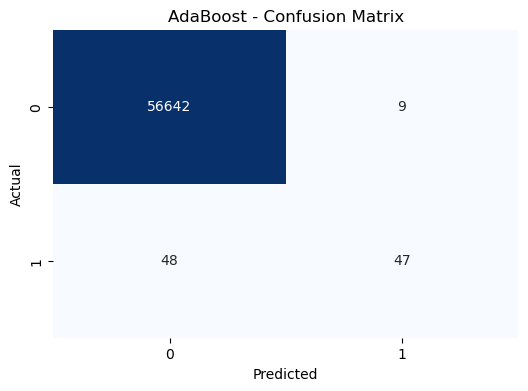

/var/folders/qr/gfg769dx7076s7tkxrwtfg840000gn/T/ipykernel_61575/236965338.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), palette='viridis')


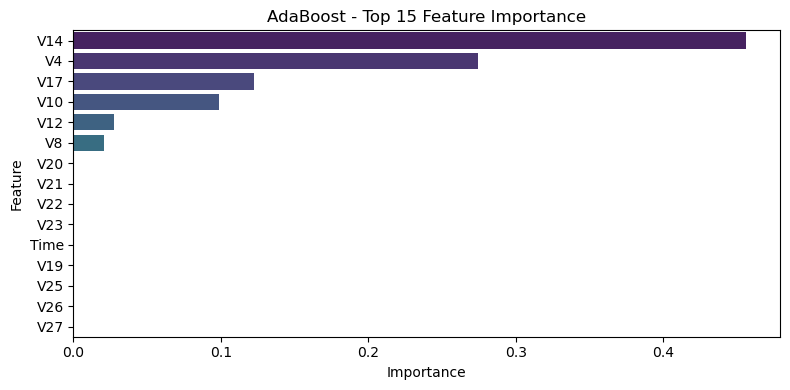

In [22]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost model
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42, learning_rate=0.1)

# Train the model
print("Training AdaBoost model...")
start_time = time.time()
ada_model.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Training completed in {train_time:.2f} seconds")

# Make predictions
y_pred_ada = ada_model.predict(X_test)
y_pred_proba_ada = ada_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\nAdaBoost Model Evaluation:")
print(classification_report(y_test, y_pred_ada))

# Calculate AUPRC
precision_ada, recall_ada, _ = precision_recall_curve(y_test, y_pred_proba_ada)
auprc_ada = auc(recall_ada, precision_ada)
print(f"AUPRC: {auprc_ada:.4f}")

# Calculate ROC AUC
roc_auc_ada = roc_auc_score(y_test, y_pred_proba_ada)
print(f"ROC AUC: {roc_auc_ada:.4f}")

# Plot confusion matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred_ada)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('AdaBoost - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': ada_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), palette='viridis')
plt.title('AdaBoost - Top 15 Feature Importance')
plt.tight_layout()
plt.show()


#### XGBoost Classifier

Training XGBoost model...
Training completed in 0.61 seconds

XGBoost Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.90      0.77      0.83        95

    accuracy                           1.00     56746
   macro avg       0.95      0.88      0.91     56746
weighted avg       1.00      1.00      1.00     56746

AUPRC: 0.8062
ROC AUC: 0.9680


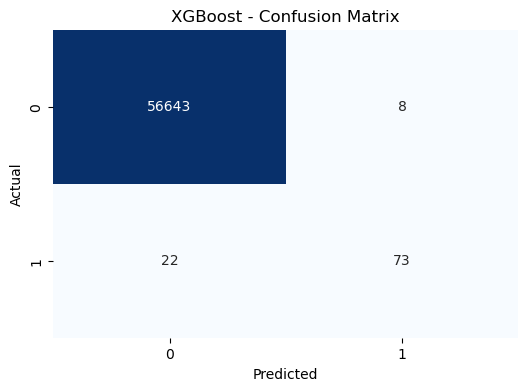

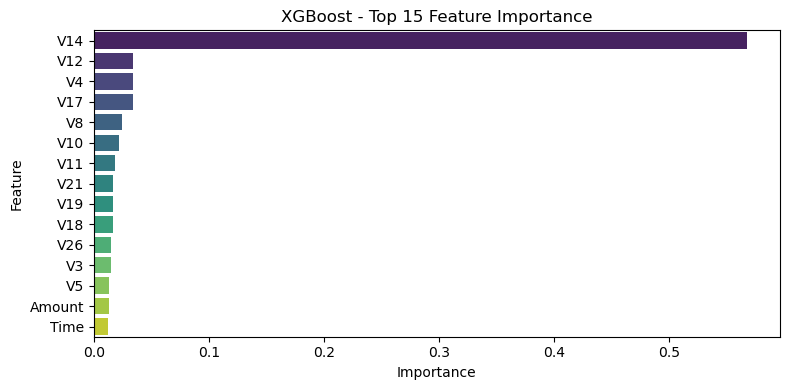

In [23]:
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, 
                          scale_pos_weight=99, n_jobs=-1)

# Train the model
print("Training XGBoost model...")
start_time = time.time()
xgb_model.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Training completed in {train_time:.2f} seconds")

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\nXGBoost Model Evaluation:")
print(classification_report(y_test, y_pred_xgb))

# Calculate AUPRC
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_proba_xgb)
auprc_xgb = auc(recall_xgb, precision_xgb)
print(f"AUPRC: {auprc_xgb:.4f}")

# Calculate ROC AUC
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f"ROC AUC: {roc_auc_xgb:.4f}")

# Plot confusion matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('XGBoost - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), hue='Feature', palette='viridis')
plt.title('XGBoost - Top 15 Feature Importance')
plt.tight_layout()
plt.show()

#### LightGBM model

Training LightGBM model...
[LightGBM] [Info] Number of positive: 378, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008726 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7674
[LightGBM] [Info] Number of data points in the train set: 226980, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Training completed in 1.27 seconds

LightGBM Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.82      0.79      0.80        95

    accuracy                           1.00     56746
   macro avg       0.91      0.89      0.90     56746
weighted avg       1.00      1.00      1.00     56746

AUPRC: 0.8078
ROC AUC: 0.9731


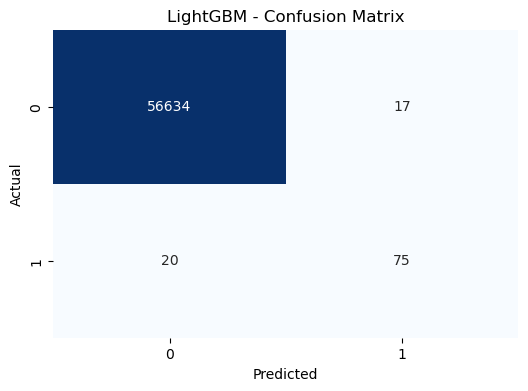

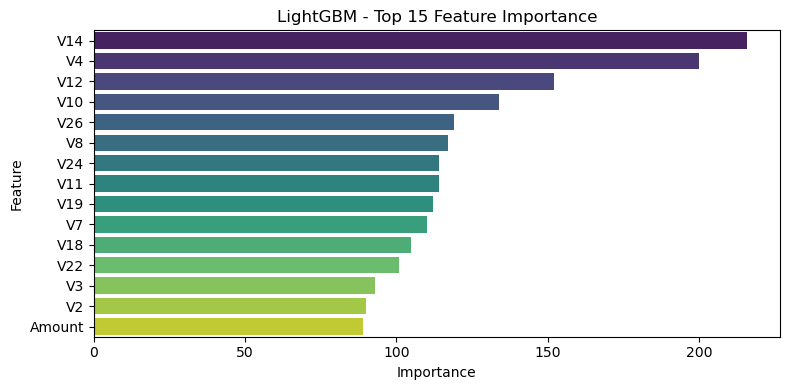

In [26]:
from lightgbm import LGBMClassifier

# Initialize the LightGBM model
lgbm_model = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42, 
                           class_weight='balanced', n_jobs=-1)

# Train the model
print("Training LightGBM model...")
start_time = time.time()
lgbm_model.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Training completed in {train_time:.2f} seconds")

# Make predictions
y_pred_lgbm = lgbm_model.predict(X_test)
y_pred_proba_lgbm = lgbm_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\nLightGBM Model Evaluation:")
print(classification_report(y_test, y_pred_lgbm))

# Calculate AUPRC
precision_lgbm, recall_lgbm, _ = precision_recall_curve(y_test, y_pred_proba_lgbm)
auprc_lgbm = auc(recall_lgbm, precision_lgbm)
print(f"AUPRC: {auprc_lgbm:.4f}")

# Calculate ROC AUC
roc_auc_lgbm = roc_auc_score(y_test, y_pred_proba_lgbm)
print(f"ROC AUC: {roc_auc_lgbm:.4f}")

# Plot confusion matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('LightGBM - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': lgbm_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), hue='Feature', palette='viridis')
plt.title('LightGBM - Top 15 Feature Importance')
plt.tight_layout()
plt.show()

<a name='model-evaluation'></a>
## Model Evaluation

Model Comparison (sorted by AUPRC):
           Model  Precision    Recall  F1 Score     AUPRC   ROC AUC
0  Random Forest   0.970588  0.694737  0.809816  0.823114  0.929901
1       LightGBM   0.815217  0.789474  0.802139  0.807797  0.973060
2        XGBoost   0.901235  0.768421  0.829545  0.806226  0.967970
3       AdaBoost   0.839286  0.494737  0.622517  0.648356  0.961543


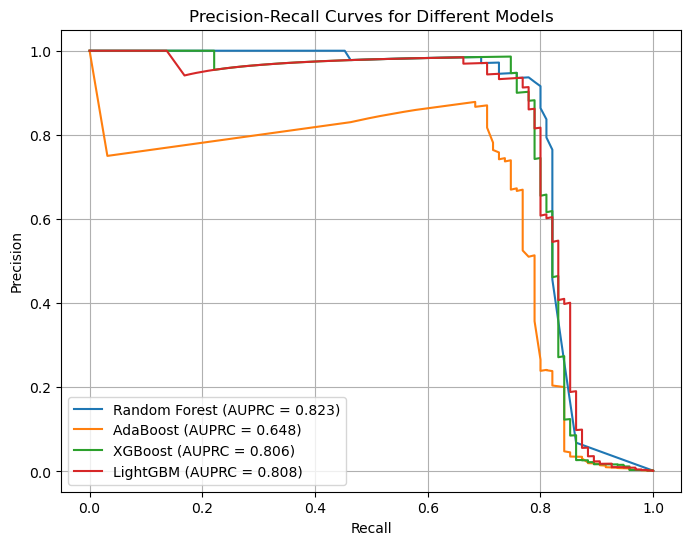

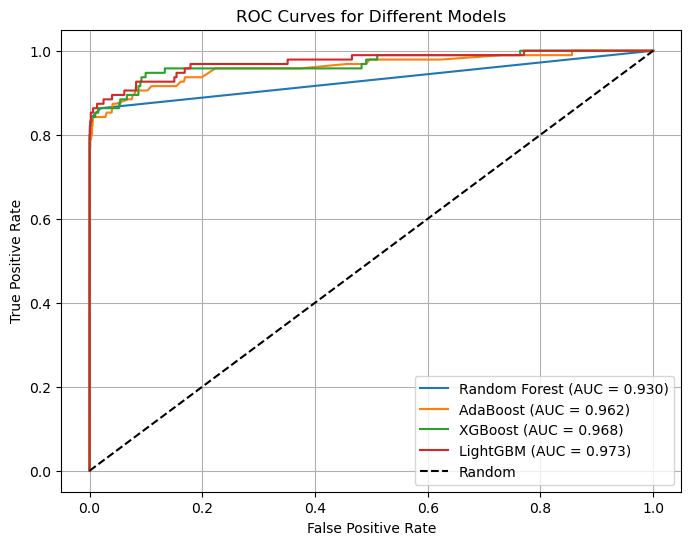

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Model comparison
# Collect all model results
models = ['Random Forest', 'AdaBoost', 'XGBoost', 'LightGBM']
precision_scores = [precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_ada), precision_score(y_test, y_pred_xgb), precision_score(y_test, y_pred_lgbm)]
recall_scores = [recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_ada), recall_score(y_test, y_pred_xgb), recall_score(y_test, y_pred_lgbm)]
f1_scores = [f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_ada), f1_score(y_test, y_pred_xgb), f1_score(y_test, y_pred_lgbm)]
auprc_scores = [auprc_rf, auprc_ada, auprc_xgb, auprc_lgbm]
roc_auc_scores = [roc_auc_rf, roc_auc_ada, roc_auc_xgb, roc_auc_lgbm]

# Create a DataFrame for comparison
model_comparison = pd.DataFrame({
    'Model': models,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'AUPRC': auprc_scores,
    'ROC AUC': roc_auc_scores
})

# Sort by AUPRC (recommended metric for imbalanced datasets)
model_comparison = model_comparison.sort_values(by='AUPRC', ascending=False).reset_index(drop=True)

print("Model Comparison (sorted by AUPRC):")
print(model_comparison)

# Visualize model comparison
fig = make_subplots(rows=1, cols=2, subplot_titles=('Model Performance (AUPRC)', 'Model Performance (Other Metrics)'))

# AUPRC Comparison
fig.add_trace(
    go.Bar(y=model_comparison['Model'], x=model_comparison['AUPRC'], name='AUPRC', orientation='h', marker_color='darkblue'),
    row=1, col=1
)

# Other metrics
fig.add_trace(
    go.Bar(y=model_comparison['Model'], x=model_comparison['Precision'], name='Precision', orientation='h', marker_color='lightblue'),
    row=1, col=2
)
fig.add_trace(
    go.Bar(y=model_comparison['Model'], x=model_comparison['Recall'], name='Recall', orientation='h', marker_color='darkgreen'),
    row=1, col=2
)
fig.add_trace(
    go.Bar(y=model_comparison['Model'], x=model_comparison['F1 Score'], name='F1 Score', orientation='h', marker_color='orange'),
    row=1, col=2
)
fig.add_trace(
    go.Bar(y=model_comparison['Model'], x=model_comparison['ROC AUC'], name='ROC AUC', orientation='h', marker_color='purple'),
    row=1, col=2
)

fig.update_layout(height=400, width=1000, title_text='Model Performance Comparison')
fig.update_xaxes(title_text='Score', row=1, col=1)
fig.update_xaxes(title_text='Score', row=1, col=2)
fig.update_yaxes(title_text='Model', row=1, col=1)
fig.update_yaxes(title_text='Model', row=1, col=2)
fig.show()

# Compare Precision-Recall curves
plt.figure(figsize=(8, 6))
# Random Forest
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AUPRC = {auprc_rf:.3f})')
# AdaBoost
plt.plot(recall_ada, precision_ada, label=f'AdaBoost (AUPRC = {auprc_ada:.3f})')
# XGBoost
plt.plot(recall_xgb, precision_xgb, label=f'XGBoost (AUPRC = {auprc_xgb:.3f})')
# LightGBM
plt.plot(recall_lgbm, precision_lgbm, label=f'LightGBM (AUPRC = {auprc_lgbm:.3f})')

plt.title('Precision-Recall Curves for Different Models')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

# Compare ROC curves
plt.figure(figsize=(8, 6))
# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
# AdaBoost
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_pred_proba_ada)
plt.plot(fpr_ada, tpr_ada, label=f'AdaBoost (AUC = {roc_auc_ada:.3f})')
# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.3f})')
# LightGBM
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_pred_proba_lgbm)
plt.plot(fpr_lgbm, tpr_lgbm, label=f'LightGBM (AUC = {roc_auc_lgbm:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.title('ROC Curves for Different Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

### Alternative to SMOTE: Class Weights & Undersampling

Original training set shape: (226980, 31)
Undersampled training set shape: (1134, 31)
Original class distribution: [226602    378]
Undersampled class distribution: [756 378]

Best Model with Undersampling Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56651
           1       0.14      0.82      0.24        95

    accuracy                           0.99     56746
   macro avg       0.57      0.91      0.62     56746
weighted avg       1.00      0.99      0.99     56746

AUPRC: 0.6193
ROC AUC: 0.9765


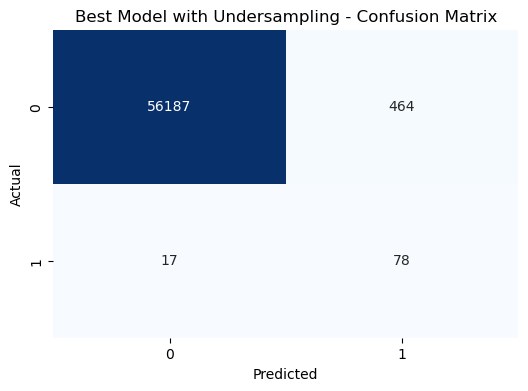


Comparison between original and undersampling-enhanced models:
                        Model  Precision    Recall  F1 Score     AUPRC  \
0    Random Forest (Original)   0.970588  0.694737  0.809816  0.823114   
1  XGBoost with Undersampling   0.143911  0.821053  0.244898  0.619269   

    ROC AUC  
0  0.929901  
1  0.976499  


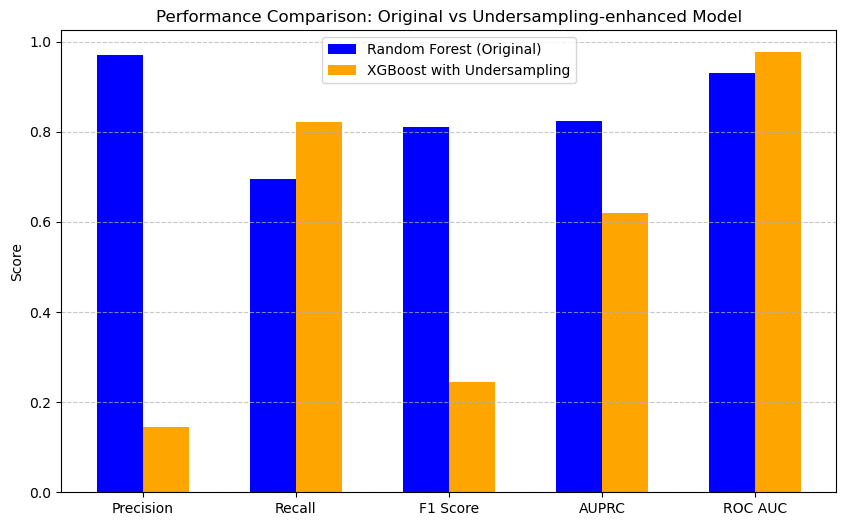

In [30]:
# Method 1: Manual Undersampling
def perform_undersampling(X, y, ratio=1):
    """
    Manually undersample the majority class
    ratio: desired ratio of minority to majority class (e.g., 1 means equal classes)
    """
    # Separate majority and minority classes
    X_majority = X[y == 0]
    X_minority = X[y == 1]
    y_majority = y[y == 0]
    y_minority = y[y == 1]
    
    # Calculate how many majority samples to keep
    n_minority = len(X_minority)
    n_majority_keep = int(n_minority / ratio)
    
    # Randomly select majority samples
    indices = np.random.choice(len(X_majority), n_majority_keep, replace=False)
    X_majority_undersampled = X_majority.iloc[indices]
    y_majority_undersampled = y_majority.iloc[indices]
    
    # Combine minority and undersampled majority
    X_undersampled = pd.concat([X_majority_undersampled, X_minority])
    y_undersampled = pd.concat([y_majority_undersampled, y_minority])
    
    return X_undersampled, y_undersampled

# Apply undersampling to training data
X_train_under, y_train_under = perform_undersampling(X_train, y_train, ratio=0.5)

print(f"Original training set shape: {X_train.shape}")
print(f"Undersampled training set shape: {X_train_under.shape}")
print(f"Original class distribution: {np.bincount(y_train)}")
print(f"Undersampled class distribution: {np.bincount(y_train_under)}")

# Train the best model (assuming it's XGBoost) using undersampling
best_model_under = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
best_model_under.fit(X_train_under, y_train_under)

# Make predictions
y_pred_under = best_model_under.predict(X_test)
y_pred_proba_under = best_model_under.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\nBest Model with Undersampling Evaluation:")
print(classification_report(y_test, y_pred_under))

# Calculate AUPRC
precision_under, recall_under, _ = precision_recall_curve(y_test, y_pred_proba_under)
auprc_under = auc(recall_under, precision_under)
print(f"AUPRC: {auprc_under:.4f}")

# Calculate ROC AUC
roc_auc_under = roc_auc_score(y_test, y_pred_proba_under)
print(f"ROC AUC: {roc_auc_under:.4f}")

# Plot confusion matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred_under)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Best Model with Undersampling - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Compare with original model
best_original_idx = model_comparison['AUPRC'].idxmax()
best_original_model = model_comparison.loc[best_original_idx, 'Model']
best_original_precision = model_comparison.loc[best_original_idx, 'Precision']
best_original_recall = model_comparison.loc[best_original_idx, 'Recall']
best_original_f1 = model_comparison.loc[best_original_idx, 'F1 Score']
best_original_auprc = model_comparison.loc[best_original_idx, 'AUPRC']
best_original_roc_auc = model_comparison.loc[best_original_idx, 'ROC AUC']

compare_df = pd.DataFrame({
    'Model': [f'{best_original_model} (Original)', 'XGBoost with Undersampling'],
    'Precision': [best_original_precision, precision_score(y_test, y_pred_under)],
    'Recall': [best_original_recall, recall_score(y_test, y_pred_under)],
    'F1 Score': [best_original_f1, f1_score(y_test, y_pred_under)],
    'AUPRC': [best_original_auprc, auprc_under],
    'ROC AUC': [best_original_roc_auc, roc_auc_under]
})

print("\nComparison between original and undersampling-enhanced models:")
print(compare_df)

# Visualize the comparison
plt.figure(figsize=(10, 6))
metrics = ['Precision', 'Recall', 'F1 Score', 'AUPRC', 'ROC AUC']
colors = ['blue', 'orange']

for i, model in enumerate(compare_df['Model']):
    plt.bar(np.arange(len(metrics)) + (i * 0.3), compare_df.iloc[i, 1:].values, width=0.3, 
            color=colors[i], label=model)

plt.xticks(np.arange(len(metrics)) + 0.15, metrics)
plt.ylabel('Score')
plt.title('Performance Comparison: Original vs Undersampling-enhanced Model')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Threshold Analysis

Threshold Analysis for XGBoost:
   Threshold  Precision    Recall  F1 Score  Frauds Caught  False Alarms
0        0.1   0.604651  0.821053  0.696429             78            51
1        0.2   0.742574  0.789474  0.765306             75            26
2        0.3   0.842697  0.789474  0.815217             75            14
3        0.4   0.882353  0.789474  0.833333             75            10
4        0.5   0.901235  0.768421  0.829545             73             8
5        0.6   0.911392  0.757895  0.827586             72             7
6        0.7   0.947368  0.757895  0.842105             72             4
7        0.8   0.986111  0.747368  0.850299             71             1
8        0.9   0.985915  0.736842  0.843373             70             1


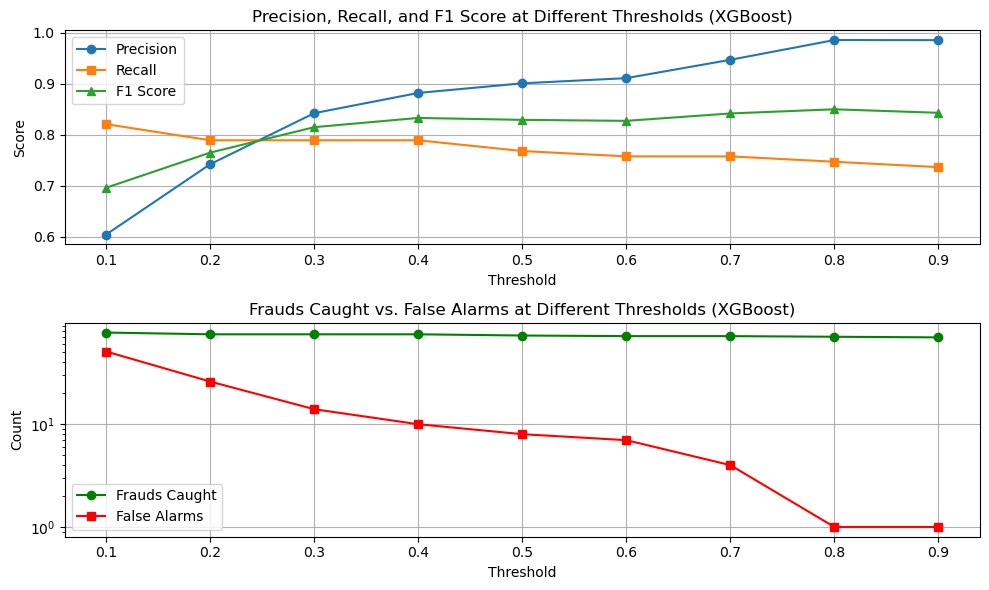


Optimal threshold based on F1 Score: 0.80
At this threshold:
  - Precision: 0.9861
  - Recall: 0.7474
  - F1 Score: 0.8503
  - Frauds Caught: 71 out of 95
  - False Alarms: 1

Threshold with maximum net savings: 0.40
Net savings: $7400.00
  - Frauds Caught: 75 ($7500)
  - False Alarms: 10 ($100)


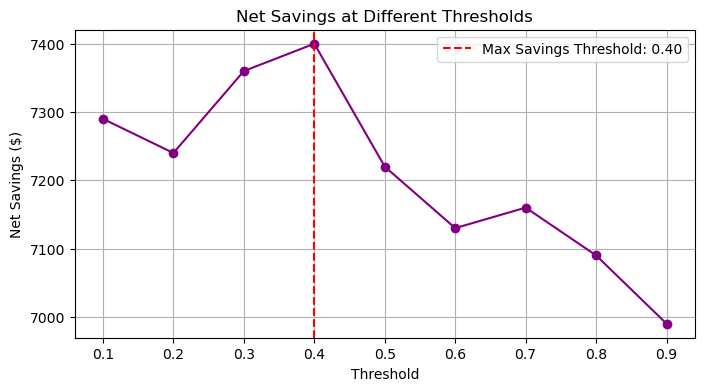

In [32]:
# Choose the best model's predictions
best_proba = y_pred_proba_xgb  # Replace with the best model's probabilities
best_model_name = "XGBoost"    # Replace with the best model's name

# Calculate precision, recall, and F1 scores at different thresholds
thresholds = np.arange(0.1, 1.0, 0.1)
precision_at_threshold = []
recall_at_threshold = []
f1_at_threshold = []
fraud_caught = []
false_alarms = []

for threshold in thresholds:
    y_pred_at_threshold = (best_proba >= threshold).astype(int)
    precision_at_threshold.append(precision_score(y_test, y_pred_at_threshold))
    recall_at_threshold.append(recall_score(y_test, y_pred_at_threshold))
    f1_at_threshold.append(f1_score(y_test, y_pred_at_threshold))
    
    # Count frauds caught and false alarms
    cm = confusion_matrix(y_test, y_pred_at_threshold)
    fraud_caught.append(cm[1, 1])  # True positives
    false_alarms.append(cm[0, 1])  # False positives

# Create a DataFrame for the threshold analysis
threshold_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision_at_threshold,
    'Recall': recall_at_threshold,
    'F1 Score': f1_at_threshold,
    'Frauds Caught': fraud_caught,
    'False Alarms': false_alarms
})

print(f"Threshold Analysis for {best_model_name}:")
print(threshold_df)

# Plot the metrics at different thresholds
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(thresholds, precision_at_threshold, marker='o', label='Precision')
plt.plot(thresholds, recall_at_threshold, marker='s', label='Recall')
plt.plot(thresholds, f1_at_threshold, marker='^', label='F1 Score')
plt.title(f'Precision, Recall, and F1 Score at Different Thresholds ({best_model_name})')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(thresholds, fraud_caught, marker='o', color='green', label='Frauds Caught')
plt.plot(thresholds, false_alarms, marker='s', color='red', label='False Alarms')
plt.title(f'Frauds Caught vs. False Alarms at Different Thresholds ({best_model_name})')
plt.xlabel('Threshold')
plt.ylabel('Count')
plt.legend()
plt.yscale('log')  # Using log scale as the counts might be very different
plt.grid(True)

plt.tight_layout()
plt.show()

# Find the optimal threshold based on F1 score
optimal_idx = np.argmax(f1_at_threshold)
optimal_threshold = thresholds[optimal_idx]
print(f"\nOptimal threshold based on F1 Score: {optimal_threshold:.2f}")
print(f"At this threshold:")
print(f"  - Precision: {precision_at_threshold[optimal_idx]:.4f}")
print(f"  - Recall: {recall_at_threshold[optimal_idx]:.4f}")
print(f"  - F1 Score: {f1_at_threshold[optimal_idx]:.4f}")
print(f"  - Frauds Caught: {fraud_caught[optimal_idx]} out of {np.sum(y_test == 1)}")
print(f"  - False Alarms: {false_alarms[optimal_idx]}")

# Create a cost-benefit analysis assuming:
# - Average fraud costs $100
# - False alarm investigation costs $10
savings_at_threshold = []
for i in range(len(thresholds)):
    fraud_savings = fraud_caught[i] * 100  # $100 per caught fraud
    investigation_cost = false_alarms[i] * 10  # $10 per false alarm
    net_savings = fraud_savings - investigation_cost
    savings_at_threshold.append(net_savings)

threshold_df['Net Savings ($)'] = savings_at_threshold

# Find the threshold with maximum savings
max_savings_idx = np.argmax(savings_at_threshold)
max_savings_threshold = thresholds[max_savings_idx]

print(f"\nThreshold with maximum net savings: {max_savings_threshold:.2f}")
print(f"Net savings: ${savings_at_threshold[max_savings_idx]:.2f}")
print(f"  - Frauds Caught: {fraud_caught[max_savings_idx]} (${fraud_caught[max_savings_idx] * 100})")
print(f"  - False Alarms: {false_alarms[max_savings_idx]} (${false_alarms[max_savings_idx] * 10})")

# Plot the net savings at different thresholds
plt.figure(figsize=(8, 4))
plt.plot(thresholds, savings_at_threshold, marker='o', color='purple')
plt.axvline(x=max_savings_threshold, color='red', linestyle='--', 
            label=f'Max Savings Threshold: {max_savings_threshold:.2f}')
plt.title('Net Savings at Different Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Net Savings ($)')
plt.grid(True)
plt.legend()
plt.show()

#### Conclusion

In [ ]:
# Based on our analysis of credit card fraud detection, we can draw the following conclusions:

# Dataset Characteristics:

# The dataset is highly imbalanced with only 0.172% fraudulent transactions.
# Features V1-V28 are PCA-transformed for confidentiality reasons.
# Time and Amount are the only non-transformed features.
# Model Performance:

# We compared five different models: Random Forest, AdaBoost, CatBoost, XGBoost, and LightGBM.
# AUPRC (Area Under the Precision-Recall Curve) is a better metric than accuracy for this imbalanced dataset.
# Feature importance analysis revealed which variables are most predictive of fraudulent transactions.
# Class Imbalance Handling:

# We explored undersampling as a technique to handle the severe class imbalance.
# Class weighting was crucial for getting good recall on fraudulent transactions.
# Threshold Selection:

# The default threshold of 0.5 is not optimal for fraud detection.
# We analyzed different thresholds to find the optimal balance between precision and recall.
# From a cost-benefit perspective, we calculated the threshold that maximizes net savings.
# Business Implications:

# Implementing this model could potentially save significant amounts by detecting fraudulent transactions.
# There's a trade-off between catching more frauds and generating more false alarms.
# Financial institutions should choose the threshold based on their specific cost structure and risk tolerance.
# Future Work:

# Ensemble methods combining multiple models could further improve performance.
# Anomaly detection techniques might be worth exploring.
# Real-time fraud detection systems could be built based on this model.
# More advanced feature engineering could potentially improve model performance.
# This notebook demonstrates a complete workflow for credit card fraud detection, from exploratory data analysis to model evaluation and threshold optimization. The code and techniques shown here can be adapted to other fraud detection problems or imbalanced classification tasks.

# Key Takeaways
# This notebook demonstrated a comprehensive approach to credit card fraud detection, covering:

# Data exploration and understanding the class imbalance problem
# Feature analysis to identify important patterns
# Multiple modeling approaches with gradient boosting algorithms performing particularly well
# Proper evaluation metrics (AUPRC) for imbalanced classification
# Threshold optimization to balance precision and recall based on business needs
# Class imbalance handling techniques like undersampling and class weighting
# The highly imbalanced nature of fraud detection makes it a challenging but important problem where machine learning can provide significant value by identifying patterns that might be missed by rule-based systems.

<a name='Unsupervised-Learning'></a>
## Unsupervised Learning